In [101]:
%load_ext autoreload
%autoreload 2
from dgnss_utils import panoseti_file_interfaces as pfi
from dgnss_utils import pff
import pandas as pd
from decimal import *
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_dir = '/Users/nico/Downloads/panoseti_test_data/obs_data/data'
run_dir = 'obs_Lick.start_2023-08-29T04:49:58Z.runtype_sci-obs.pffd'

In [60]:
ori = pfi.ObservingRunInterface(data_dir, run_dir)
ori.obs_pff_files

{254: {'img': [],
  'ph': [{'fname': 'start_2023-08-29T04_50_46Z.dp_ph256.bpp_2.module_254.seqno_0.pff',
    'seqno': 0,
    'nframes': 12659,
    'first_unix_t': Decimal('1693284653.770646846'),
    'last_unix_t': Decimal('1693295935.356830584')}]},
 1: {'img': [{'fname': 'start_2023-08-29T04_50_49Z.dp_img16.bpp_2.module_1.seqno_0.pff',
    'seqno': 0,
    'nframes': 1574804,
    'first_unix_t': Decimal('1693284655.214407488'),
    'last_unix_t': Decimal('1693284812.694707488')},
   {'fname': 'start_2023-08-29T04_53_33Z.dp_img16.bpp_2.module_1.seqno_1.pff',
    'seqno': 1,
    'nframes': 1574804,
    'first_unix_t': Decimal('1693284812.694807488'),
    'last_unix_t': Decimal('1693284970.175107488')}],
  'ph': [{'fname': 'start_2023-08-29T04_50_49Z.dp_ph256.bpp_2.module_1.seqno_0.pff',
    'seqno': 0,
    'nframes': 10519,
    'first_unix_t': Decimal('1693284655.602063831'),
    'last_unix_t': Decimal('1693295937.169311272')}]},
 3: {'img': [],
  'ph': [{'fname': 'start_2023-08-29T04_5

In [78]:
fname = ori.obs_pff_files[1]["ph"][0]["fname"]
fpath = f'{data_dir}/{run_dir}/{fname}'

In [79]:
columns = [
    'timestamp',
    'date',
    'quabo_num',
    'pkt_num',
    'pkt_tai',
    'pkt_nsec',
    'tv_sec',
    'tv_usec',
    # 'img_data'
]
ph_df = pd.DataFrame(columns=columns)

with open(fpath, 'rb') as fp:
    frame_iterator = ori.pulse_height_frame_iterator(fp, 1)
    for j, img in frame_iterator:
        j['timestamp'] = pff.wr_to_unix_decimal(j['pkt_tai'], j['pkt_nsec'], j['tv_sec'])
        # j['img_data'] = img
        ph_df.loc[len(ph_df)] = j
ph_df['date'] = pd.to_datetime(ph_df['timestamp'].astype(np.float64), unit = 's')
ph_df = ph_df.sort_values(by='timestamp')
ph_df

,timestamp,date,quabo_num,pkt_num,pkt_tai,pkt_nsec,tv_sec,tv_usec
0,1693284655.602063831,2023-08-29 04:50:55.602063872,0,47781,340,602063831,1693284656,152577
1,1693284656.155346976,2023-08-29 04:50:56.155346944,3,48292,341,155346976,1693284656,705883
2,1693284657.670881964,2023-08-29 04:50:57.670882048,2,45865,342,670881964,1693284658,221423
3,1693284659.207500895,2023-08-29 04:50:59.207501056,1,48674,344,207500895,1693284659,758032
4,1693284659.951247839,2023-08-29 04:50:59.951247872,3,48293,344,951247839,1693284660,501789
...,...,...,...,...,...,...,...,...
10514,1693295934.592395445,2023-08-29 07:58:54.592395520,0,50062,355,592395445,1693295935,156202
10515,1693295935.325977042,2023-08-29 07:58:55.325977088,0,50063,356,325977042,1693295935,889779
10516,1693295935.356830588,2023-08-29 07:58:55.356830720,3,51563,356,356830588,1693295935,920654
10517,1693295935.731950196,2023-08-29 07:58:55.731950336,0,50064,356,731950196,1693295936,295753


In [116]:
ph_df['time_differential (ns)'] = ph_df['timestamp'].diff() * 10**9#.dropna()

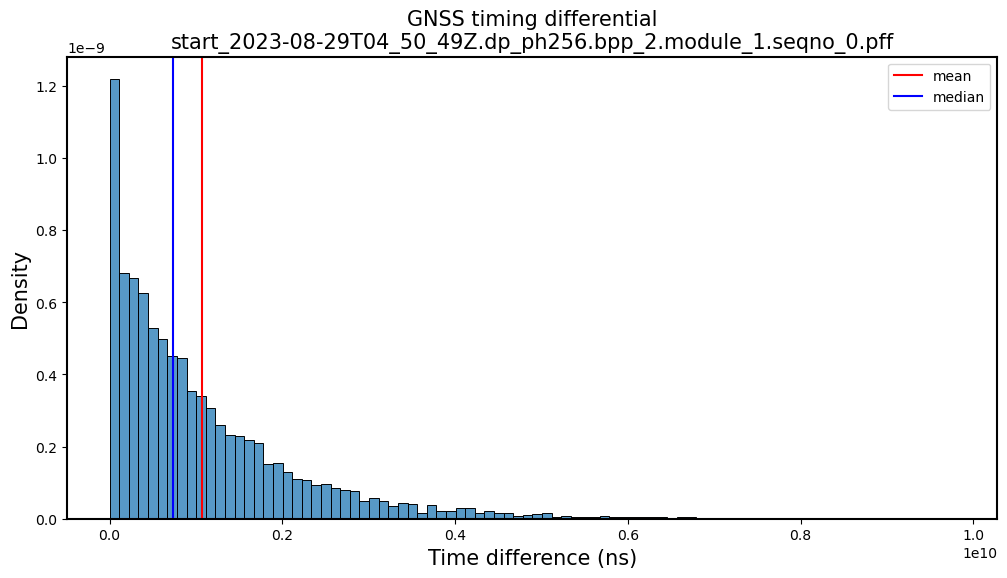

In [121]:
plt.figure(figsize=(12,6))
plt.xlabel('Time difference (ns)')
plt.title(f'GNSS timing differential\n{fname}')
plt.axvline(x=ph_df['time_differential (ns)'].mean().astype(np.float64), label='mean', c='r')
plt.axvline(x=ph_df['time_differential (ns)'].median().astype(np.float64), label='median', c='b')

plt.legend()
sns.histplot(ph_df, x='time_differential (ns)', stat='density');

<Axes: xlabel='date', ylabel='time_differential'>

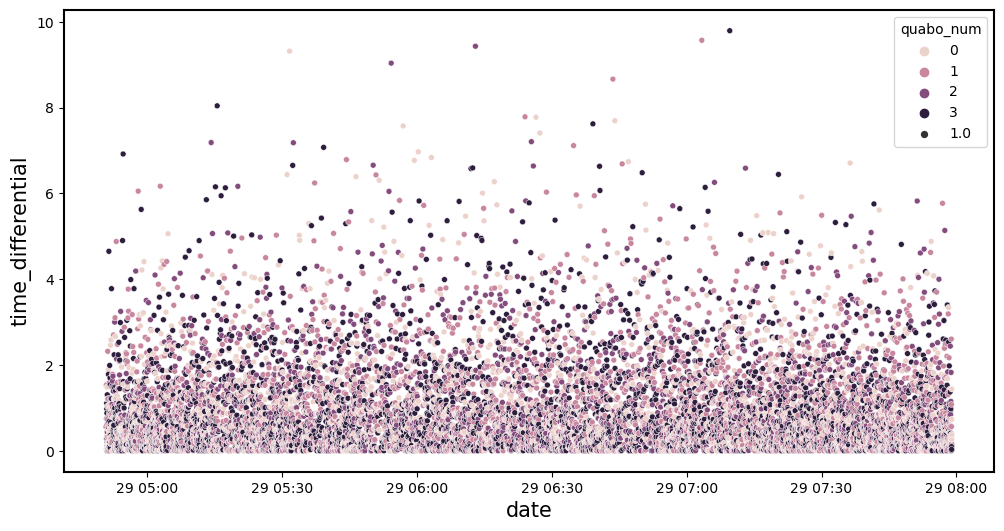

In [83]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    ph_df,
    x='date',
    y='time_differential',
    hue='quabo_num',
    size=1.0
)

<Axes: xlabel='quabo_num', ylabel='time_differential'>

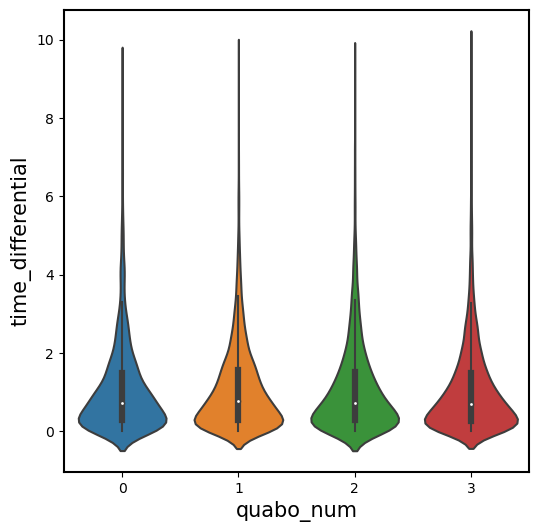

In [84]:
plt.figure(figsize=(6, 6))
sns.violinplot(
    ph_df,
    x='quabo_num',
    y='time_differential',
    size=1.0
    
)